# Weekly Assignment 1

## Author: Carolina Hernández

   ## Basics of python programming and probability: Generala
    

To do:
1. Write a function that list all the possible outcomes with five dice.
2. Write a function that takes a number of dices and return all the possible outcomes for that amount of dices.
3. Write functions that return, given five dice, ​True​ or ​False​ if we have Straight, Full, Poker or Generala.
4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands ​served​.
5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.
6. Write a function that simulate a roll with n fair dices.
7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns ​True​ if we get a Generala and a ​False​ otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.
8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

## 1. Write a function that list all the possible outcomes with five dice.
### If we are flipping the dice n times, all the possible outcomes are the permutations of six possible values [1,2,3,4,5,6] in a list of five elements, allowing repetitions is just  6**5.

In [56]:
def dice5():
    allPossibleOutComes5 = [[]] # Create an empty list which will contain every possible result
    # Each time I roll the dices
    for dices in range(5):
        # To all the existing already computed outputs
        allPossibleOutComes5Copy = allPossibleOutComes5.copy() # Copy the previous results to keep track in the next loop
        allPossibleOutComes5 = [] # Overwrite the initial list to remove the previous results
        for intermediateOutcome in allPossibleOutComes5Copy: # For each outcome in the previous result
            for outcome in [1,2,3,4,5,6]: 
                allPossibleOutComes5.append(intermediateOutcome + [outcome])

    return allPossibleOutComes5


## 2. Write a function that takes a number of dices and return all the possible outcomes for that amount of dices.

In [29]:
def diceToRoll(n): # Indicating the number of dice to roll
    """Returns a list with all possible outcomes of rolling n dice"""
    outcomes = [[]]
    for dice in range(n):
        previousOutcome = outcomes.copy()
        outcomes = []
        for result in previousOutcome:
            for points in range(1, 7):
                outcome.append(result + [points])
    return outcomes

## 3. Write functions that return, given five dice, ​True​ or ​False​ if we have Straight, Full, Poker or Generala.

In [20]:
def generala(dice):
    return len(set(dice)) == 1

def poker(dice):
    cmc = most_common(dice)
    return dice.count(cmc) >= 4

def fullhouse(dice):
    cmc = most_common(dice)
    return dice.count(cmc) == 3 and len(set(dice)) == 2

def escalera(dice):
    s = set(dice)
    return s == {1, 2, 3, 4, 5} or s == {2, 3, 4, 5, 6} or s == {1, 3, 4, 5, 6}


## 4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands ​served​.

In [57]:
def prob_served_straight():
    all_outcomes = dice5()
    fav_outcomes = [outcome for outcome in all_outcomes if len(set(outcome)) == 5]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Straight with a served hand is %.5f." %(prob_served_straight()))

The probability of getting a Straight with a served hand is 0.09259.


In [59]:
def prob_served_full():
    all_outcomes = dice5()
    fav_outcomes = [outcome for outcome in all_outcomes if ((len(set(outcome)) == 2) &
                    (outcome.count(set(outcome).pop()) in [2, 3]))]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Full with a served hand is %.5f." %(prob_served_full()))

The probability of getting a Full with a served hand is 0.03858.


In [60]:
def prob_served_poker():
    all_outcomes = dice5()
    fav_outcomes = [outcome for outcome in all_outcomes if ((len(set(outcome)) == 2) &
                    (outcome.count(set(outcome).pop()) in [1, 4]))]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Poker with a served hand is %.5f." %(prob_served_poker()))

The probability of getting a Poker with a served hand is 0.01929.


In [61]:
def prob_served_generala():
    all_outcomes = dice5()
    fav_outcomes = [outcome for outcome in all_outcomes if len(set(outcome)) == 1]
    return len(fav_outcomes) / len(all_outcomes)

print("The probability of getting a Generala with a served hand is %.5f." %(prob_served_generala()))

The probability of getting a Generala with a served hand is 0.00077.


## 5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands

## 6. Write a function that simulate a roll with n fair dices.

In [42]:
from random import randint
def roll(n):
    """Returns a list with the results of a roll with n dice"""
    return [randint(1, 6) for dice in range(n)]

## 7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dice of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook

In [43]:
def generala_game():
    """Returns True if a Generala was obtained or False otherwise"""
    roll1 = roll(5)  # First roll
    if len(set(roll1)) == 1:  # If it is a Generala, return True
        return True
    else:  # Second roll
        keep_num = max(set(roll1), key = roll1.count)  # Get the most repeated value in the roll
        keep_dice = roll1.count(keep_num)  # Get the number of dice with that value in the roll
        roll2 = roll(5 - keep_dice) + [keep_num] * keep_dice  # Roll again the non-repeated dice and keep the rest
        if len(set(roll2)) == 1:
            return True
        else:  # Third roll
            keep_num = max(set(roll2), key = roll2.count)
            keep_dice = roll2.count(keep_num)
            roll3 = roll(5 - keep_dice) + [keep_num] * keep_dice
            return len(set(roll3)) == 1

In [44]:
list_results = [int(generala_game()) for result in range(10000)]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

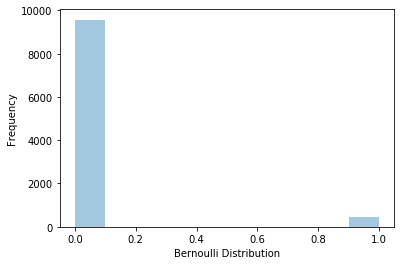

In [45]:
%matplotlib inline
import seaborn as sns

graph = sns.distplot(list_results, bins = 10, kde = False)
graph.set(xlabel = "Bernoulli Distribution", ylabel= "Frequency")

## 8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook

In [46]:
def generala():
    counter = 1
    while True:
        if generalaGame():
            return counter
            break
        else:
            counter += 1

In [47]:
list_results = [generala() for result in range(10000)]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

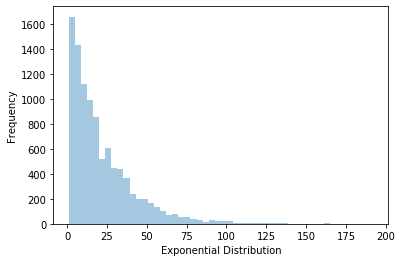

In [49]:
%matplotlib inline
import seaborn as sns

graph = sns.distplot(list_results, kde = False)
graph.set(xlabel = "Exponential Distribution", ylabel= "Frequency")